# Basics of ML

- Artificial Intelligence
- Machine Learning
- Deep Learning

## 4 Major ML Types
Not definitive list, but some of the major ones
- Supervised Learning
- Unsupervised Learning
- Reinforcement Learning
- Decision Trees


# Reinforcement Learning

![qLearningAnalogy](images/qLearningAnalogy.png)

![qLearning](images/QLearning2.png)

## Key Concepts
- Agent: The learner or decision maker
- Environment: The world the agent interacts with
- State: The current situation of the agent
- Action: The decision the agent makes
- Reward: The feedback from the environment
- Policy: The strategy the agent uses to determine next action
- Value: The expected long-term reward with discount factor
- Episode: A sequence of states, actions, and rewards

State Space: All the possible states that the agent can encounter

Action Space: All the possible actions that the agent can take in the current state 

## Key Steps

1. Observation of the environment
2. Deciding how to act using some strategy
3. Acting accordingly
4. Receiving a reward or penalty
5. Learning from the experiences and refining our strategy
6. Iterate until an optimal strategy is found

E.g. AlphaGo, Managing stock portfolios, Robotics, inventory management, self-driving cars, etc.

## Practical - Self-Driving Car

Job to pick up passenger at one location and drop them off in another.
Must take care of:
- Dropping off the passenger at the right location
- Saving passenger's time by taking minimum time possible to drop off
- Take care of the passenger's safety and traffic rules


![cabImage](images/cabImage.png)

### Question 1
For this problem, what is the:
- Agent
- Environment
- State Space
- Action Space
- Reward

In [ ]:
!pip install cmake gymnasium[toy-text] scipy matplotlib

In [37]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

setup the environment using the gym library

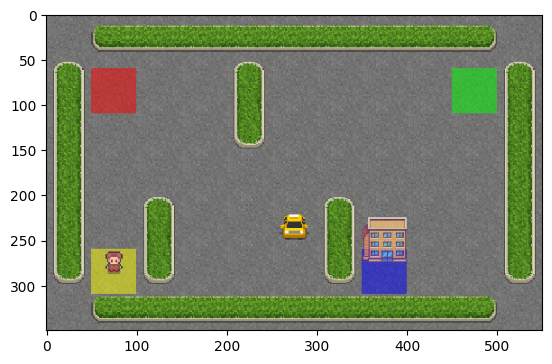

In [20]:
env = gym.make("Taxi-v3", render_mode="rgb_array")
env.reset()
img = env.render()
plt.imshow(img)
plt.show()

Main env methods:

- `reset`: Reset the environment to initial state

- `step`: Take an action in the environment. Returns:
  - observation: Observations of the environment
  - reward: Reward from the environment
  - terminated: whether the agent has reachd the terminal state as defined by task (e.g. taxi dropped off the passenger)
  - truncated: whether the episode is truncated (usually a time limit has been reached)
  - info: other info for debugging purposes
  - done: whether the episode is done

The restructured problem has now become:

```
There are 4 locations (labeled by different letters), and our job is to pick up the passenger at one location and drop him off at another. We receive +20 points for a successful drop-off and lose 1 point for every time-step it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions.
```

In [21]:
env.reset()
env.render()
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


Action Space with size 6:
- 0: south
- 1: north
- 2: east
- 3: west
- 4: pickup
- 5: dropoff

Observation Space is calculated using the function below:

`` ((taxi_row * 5 + taxi_col) * 5 + passenger_loc) * 4 + destination``

where:
passenger_loc is:
- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)
- 4: in taxi

and destination is:
- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)


Rewards are calculated by:
- +20 for successful dropoff
- -10 for illegal pickup/dropoff
- -1 for each timestep unless other reward is triggered

### Q-Learning


Uses a Q-table to store the Q-values for each state-action pair. The Q-value is the expected long-term reward with discount factor.

To find the next action, the agent uses the policy to determine the next action. The policy can be greedy, epsilon-greedy, etc.
We will use the epsilon-greedy policy for this example.

![qLearning](images/QLearningDiagram.png)

#### Key Components

Special value called Q-value which is a measure of the goodness of a particular action in a particular state. It is defined as the sum of the reward and the discounted future reward (Q-value) that the agent will receive in the future.

Temporal Difference Update Rule - rule to update the Q value at every step of agent's interaction

$Q(S,A)←(1-α)Q(S,A)+α(R+γQ(S’,A’))$

Where:

- Q(S,A) is the Q-value of the current state-action pair
- S' is the next state where agent ends up
- A' is the next best action to be picked using current Q-value estimation
- α is the learning rate (aka the step size taken to update the estimation of Q-value)
- R is the current reward observed from environment in response to current action
- γ (>0 and <=1) is the discount factor for future rewards. Future rewards are less valuable than current rewards because of uncertainty. As Q-value is defined to be estimation of future rewards, we discount future rewards by γ.

Other Q-Value update rules do exist (e.g. )

#### How does it explore the environment?

Agent starts from start state and transitions from current state to next state based on its choice of action. 

At every step of transition, agent takes an action, observes a reward from environment, and then transitions to next state.

If the agent ends up in a terminal state, the episode ends and agent starts a new episode.

At every step of transition, agent updates the Q-value of the current state-action pair using the Temporal Difference Update Rule.

The agent uses a policy to determine the next action at each step. For this tutorial, we will use the epsilon-greedy policy, defined as below:

- With probability (1-ε), agent will exploit the environment by selecting the action with the highest Q-value for the current state
- With probability (ε), agent will explore the environment by selecting a random action

Where:
- ε is the exploration rate (0<=ε<=1). A higher value of ε means the agent is more likely to explore the environment. 

In [32]:
# initialize the Q-table with zeros using numpy package
n_states = env.observation_space.n
n_actions = env.action_space.n
q_table = np.zeros([n_states, n_actions])

As with the explanation above, alpha, gamma, and epsilon are known as hyperparameters as they are not learned by the agent but are set by the user.
They affect the agent's learning process and the final policy, therefore change the agent's acuracy and speed of learning.

In [34]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

In [ ]:
all_epochs = []
all_penalties = []

In [ ]:
# for the number of episodes

    # reset the environment

    # initialize the variables

    # while the episode is not done

        # Epsilon Greedy Strategy

        # Take the action

        # Get the next state, reward, done and info

        # Get the current q-value

        # Get the maximum q-value at the next state

        # Update the q-value

In [41]:
q_table[328]

array([ -2.41160233,  -2.27325184,  -2.41273914,  -2.36131216,
       -10.52698654, -10.71969989])

In [44]:

"""Evaluate agent's performance after Q-learning"""
total_epochs, total_penalties = 0, 0
episodes = 100
for _ in range(episodes):
  state, _ = env.reset()
  epochs, penalties, reward = 0, 0, 0
  
  done = False
  
  while not done:
    action = np.argmax(q_table[state])
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    if reward == -10:
      penalties += 1
    state = next_state
    epochs += 1
  total_penalties += penalties
  total_epochs += epochs
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.18
Average penalties per episode: 0.0


# Extension Question

Try implementing a Q Learning Algorithm for a stock trading agent. It can either do a buy, sell or hold action. The reward can be the profit or loss made by the agent.
Normally, a DQN model is used instead of Q Learning for stock trading agents. (DQN is a deep learning model that uses a neural network to approximate the Q-value function)


Or try experimenting with other environments in the gymnasium library. It contains a variety of retro-style games and other environments to experiment with.

SARSA is another algorithm similar to Q-Learning, with the difference being that it updates the Q-value using the next action taken by the agent instead of the best action. Try researching and implementing SARSA as well.

Most Reinforcement Learning models follow the same principles but has a different method to update the Q-value.

# A fun fact

The new Open Source LLM, DeepSeek R1, which uses chain-of-thought reasoning process (similar to OpenAI's o1 model) uses Reinforcement Learning to hone its chain of thought and refine the strategies.

Company used DeepSeek-V3 as base model and self-evolved it using RL-based trial-and-error process. Claims that this ensures model can solve increasingly complex reasoning tasks by increasing test computation.

But as with LLM RL models, showed poor readability and language mixing. So company made a multi-stage approach by combining supervised and reinforcement learning (which was the released R1 model)